Modelo de Regressão Logistica

In [90]:
# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

import datetime as dt
import random
import seaborn as sns

#regularização e grid search para otimizar os hiperparâmetros

In [91]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [134]:
#calculando o custo
def compute_cost(X, y, theta):
    if X.shape[1] != theta.shape[0]:
        x0 = np.ones((X.shape[0],1))
        X = np.concatenate((x0,X),axis=1)
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [177]:
# Cálculo do gradiente
def gradient_descent(X, y, params, learning_rate, iterations, validation = False, X_val = None, y_val = None):
    x0 = np.ones((X.shape[0],1))
    X = np.concatenate((x0,X),axis=1)
    m = len(y)
    y = y.reshape(m,1)        
    cost_history = np.zeros((iterations,1))
    
    if validation:
        y_val = y_val.reshape(len(y_val),1)
        cost_history_val = np.zeros((iterations,1))    

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)
        
        if validation:
            cost_history_val[i] = compute_cost(X_val, y_val, params) 
            
    if validation:
        return cost_history, cost_history_val, params
        
    return cost_history, params



In [94]:
# Previsão
def predict(X, w):
    x0 = np.ones((X.shape[0],1))
    X = np.concatenate((x0,X),axis=1)
    return sigmoid(X @ w)

In [156]:
#Carregando dados 32 x 32
X = np.load('X_32x32.npy')
y = np.load('y_32x32.npy')

iterations = 400
learning_rate = 0.001

n = np.size(X,1) + 1
params = np.zeros((n,1))

print(X.shape)
print(params.shape)

(33126, 1024)
(1025, 1)


In [157]:
initial_cost = compute_cost(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

Initial Cost is: [0.69312718] 



In [158]:
(cost_history, params_optimal) = gradient_descent(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

Optimal Parameters are: 
 [[ 0.0001844 ]
 [-0.16104278]
 [-0.12576706]
 ...
 [-0.07836408]
 [-0.09836085]
 [-0.12612986]] 



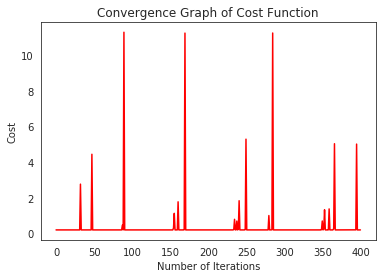

In [159]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [151]:
y_pred = predict(X, params_optimal)
y_hat = np.round(y_pred)

In [154]:
y_pred = y_pred.reshape(y_pred.shape[0])
score = sum(y_pred == y)/ len(y)

print(score)

0.025


# RANDOM UNDERSAMPLING

In [181]:
print('shape das imagens: ', X.shape)
y = y.reshape(y.shape[0],1)
print('shape dos rótulos: ', y.shape)
#concatena

data = np.concatenate((X,y),axis=1)
print('shape do array de imagens concatenados com rótulos: ', data.shape)

#separa em padrões positivos e negativos
pos_mask = data[:,-1] == 1 
pos = data[pos_mask,:]
neg_mask = data[:,-1] == 0 
neg = data[neg_mask,:]
print('shape dos padrões positivos: ', pos.shape)
print('shape dos padrões negativos: ', neg.shape)

#seleciona uma amostra aleatória de padrões negativos para igualar com a classe negativa (mais abundante)
np.random.seed(42)
idx = np.random.randint(neg.shape[0], size=pos.shape[0])
sampled = neg[idx,:]
#concatena a amostra de padrões negativos com os padrões positivos
data_sampled = np.concatenate((pos,sampled),axis=0)
print('shape do novo array de dados balanceados com rótulos: ', data_sampled.shape)
#divide em dados e rótulos (X,y)
X_sub = data_sampled[:,0:-1]
print('shape do novo array de dados balanceados: ', X_sub.shape)
y_sub = data_sampled[:,-1]
print('shape do novo array de rótulos balanceados: ', y_sub.shape)

shape das imagens:  (33126, 1024)
shape dos rótulos:  (33126, 1)
shape do array de imagens concatenados com rótulos:  (33126, 1025)
shape dos padrões positivos:  (584, 1025)
shape dos padrões negativos:  (32542, 1025)
shape do novo array de dados balanceados com rótulos:  (1168, 1025)
shape do novo array de dados balanceados:  (1168, 1024)
shape do novo array de rótulos balanceados:  (1168,)


# VALIDAÇÃO

In [160]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [221]:
#separação em treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X_sub, y_sub, test_size=0.1, random_state=42, stratify = y_sub)

#normalização
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)
X_train = (X_train - mu ) / sigma
X_val = (X_val - mu ) / sigma

In [226]:
iterations = 5000
learning_rate = 0.005
n = np.size(X,1) + 1
params = np.zeros((n,1))

(cost_history, cost_history_val, params_optimal) = gradient_descent(X_train, y_train, params, 
                                                  learning_rate, iterations, validation = True,
                                                 X_val = X_val, y_val = y_val)

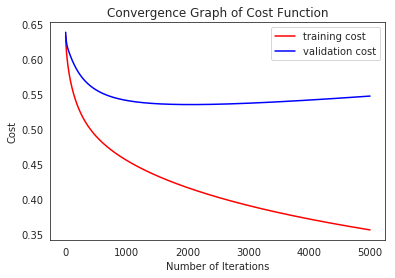

In [227]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r', label = 'training cost')
plt.plot(range(len(cost_history_val)), cost_history_val, 'b', label = 'validation cost')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend(loc="best")
plt.show()

In [228]:
np.argmin(cost_history_val)

2058

In [229]:
#predição
y_prob = predict(X_val, params_optimal)
y_pred = np.round(y_prob)

In [230]:
print('accuracy: ', metrics.accuracy_score(y_val, y_pred))
print(metrics.classification_report(y_val, y_pred))
metrics.confusion_matrix(y_val, y_pred)

accuracy:  0.7008547008547008
              precision    recall  f1-score   support

           0       0.72      0.66      0.69        59
           1       0.68      0.74      0.71        58

   micro avg       0.70      0.70      0.70       117
   macro avg       0.70      0.70      0.70       117
weighted avg       0.70      0.70      0.70       117



array([[39, 20],
       [15, 43]])

0.8074225599064875


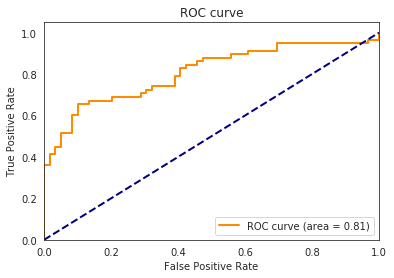

In [231]:
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_prob, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
#plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# Treino com todos os dados

In [232]:
# treino com todos os dados

#normalização
mu = np.mean(X, 0)
sigma = np.std(X, 0)
X = (X - mu ) / sigma

iterations = 2000
learning_rate = 0.005
n = np.size(X,1) + 1
params = np.zeros((n,1))

(cost_history, params_optimal) = gradient_descent(X, y, params,learning_rate, iterations)

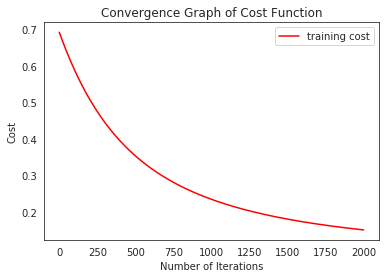

In [233]:
plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r', label = 'training cost')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend(loc="best")
plt.show()

# SUMBMISSÃO DE RESULTADOS

In [234]:
X_test = np.load('X_test_32x32.npy')
import pickle
infile = open("image_name_test.p",'rb')
image_name = pickle.load(infile)
infile.close()

In [235]:
image_name = [n.replace('.jpg','') for n in image_name]

In [242]:
y_prob = predict(X_test, params_optimal)
target = y_prob.reshape(len(y_prob))
submission_reglog = pd.DataFrame({'image_name':image_name,'target':target})

In [244]:
submission_reglog.head()

,image_name,target
0,ISIC_0232763,8.131426e-11
1,ISIC_1389671,1.831807e-11
2,ISIC_1022193,9.917069e-01
3,ISIC_6335117,2.090852e-18
4,ISIC_9333840,1.060984e-19


In [245]:
submission_reglog.to_csv('data/submission_reglog.csv',index = False)

# score: 0.7676